In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### dir setting

In [ ]:
dir = '/content/drive/My Drive/Colab Notebooks/DM/data'

In [3]:
dir = './data'

# game tag filtering

In [66]:
game = pd.read_csv (dir + '/game_list.csv', encoding = 'utf-8', header = 0)
tag = pd.read_csv (dir + '/game_tag.csv', encoding = 'utf-8', header = 0)

In [26]:
game = game.sort_values(by = 'review_count', axis = 0, ascending = False)
game = game[game['review_count'] > 500]
tag = tag['game_id'].unique()
len_before = len(game)
game = game[game['game_id'].isin(tag)]
len_after = len(game)
print (len_before, "->", len_after)
print ("No Tag: ", "%.3f"%((len_before - len_after) / len_before * 100) , "%")

3506 -> 3398
No Tag:  3.080 %


In [ ]:
game = game.reset_index(drop = True)
game

In [ ]:
game.to_csv (dir + "./game_list_valid.csv", encoding = 'utf-8', index = False, columns = ['game_id', 'review_count'])

# game play scoring

In [58]:
df_pt = pd.read_csv (dir + '/user_playtime_filtered.csv', encoding = 'utf-8', header = 0)
df_vt = pd.read_csv (dir +'/user_vote_filtered.csv', encoding = 'utf-8', header = 0)

In [59]:
my_df = pd.merge (df_pt, df_vt, how = 'outer', on = ['game_id', 'user_id'])
my_df = my_df.fillna(0)
my_df = my_df [(my_df['play_time'] != 0)]
my_df['score'] = np.log10 (my_df['play_time']+1) # +my_df['vote'] * 3
my_df = my_df.reset_index(drop = True)
my_df

,user_id,game_id,play_time,vote,score
0,76561198077358609,4000,13730.0,0.0,4.137702
1,76561198077358609,10500,775.0,0.0,2.889862
2,76561198077358609,48700,23790.0,1.0,4.376413
3,76561198077358609,33900,129.0,0.0,2.113943
4,76561198077358609,33930,4637.0,1.0,3.666331
5,76561198077358609,22380,922.0,1.0,2.965202
6,76561198077358609,31280,38.0,0.0,1.591065
7,76561198077358609,105600,312.0,0.0,2.495544
8,76561198077358609,228200,7674.0,0.0,3.885078
9,76561198077358609,10,99.0,0.0,2.000000


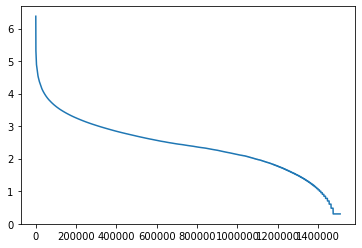

In [60]:
plt.plot (my_df.index, my_df.sort_values(by = 'score', ascending = False)['score'])

In [61]:
split_n = 5
cut = [-100]
for i in range (1, split_n) :
    cut.append (np.percentile (my_df['score'], 100 * i / split_n))

cut

def f_cut (x) :
    for i in range(split_n) :
        if x <= cut[i] :
            return i
    return split_n

In [62]:
my_df['rating'] = my_df['score'].apply(f_cut)

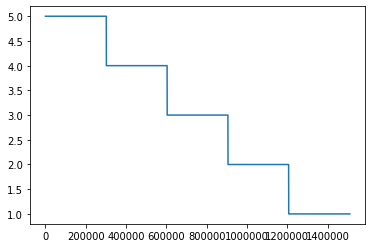

In [63]:
plt.plot (my_df.index, my_df.sort_values(by = 'rating', ascending = False)['rating'])

# CF

In [1]:
import surprise
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split
from surprise import accuracy

In [ ]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, len(my_df)))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(my_df[['user_id', 'game_id', 'rating']], reader)

In [ ]:
bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 12,
    'reg_i': 5
}
sim_options = {
    'user_based' : False
}

algo = surprise.BaselineOnly(bsl_options = bsl_options)

In [ ]:
bsl_options = {'method': 'als',
               'n_epochs': 20,
               }
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNBasic(bsl_options=bsl_options, sim_options=sim_options)

In [ ]:
algo = surprise.SVD()

In [ ]:
algo = surprise.NormalPredictor()

In [ ]:
# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(algo, data, cv=2)

In [ ]:
trainset, testset = train_test_split(data, test_size=.25)

In [ ]:
algo.fit(trainset)
predictions = algo.test(testset)

In [ ]:
pr = [{'user_id' : i.uid, 'game_id' : i.iid, 'r' : i.est} for i in predictions]
df_pr = pd.DataFrame (pr, columns = ['user_id', 'game_id', 'r'])
df = pd.merge (my_df, df_pr, how = 'right', on = ['game_id', 'user_id'])
df['r'] = df['r'].apply (np.around)

In [ ]:
len(df[df['r'] == df['rating']]) / len (df)

In [ ]:
accuracy.rmse(predictions, verbose=True)

# Classification Form

In [64]:
game_list = my_df['game_id'].drop_duplicates().reset_index (drop = True)
user_list = my_df['user_id'].drop_duplicates().reset_index (drop = True)
tag = pd.read_csv (dir + '/game_tag.csv', encoding = 'utf-8', header = 0)

In [65]:
tag['p'] = 1
tag = pd.pivot_table(tag, index = 'game_id', columns = 'tag', values = 'p', aggfunc = np.mean).fillna(0)

In [66]:
game = pd.merge (game_list, tag, how = 'left', on = ['game_id'])
game_pt = pd.pivot_table(df_pt, index = 'game_id', columns = 'user_id', values = 'play_time', aggfunc = np.mean).fillna(0)

a = game_pt[game_pt > 120]

pt_Q3 = a.quantile (0.75, axis = 1)
pt_Q2 = a.quantile (0.5, axis = 1)
pt_Q1 = a.quantile (0.25, axis = 1)

game_pt ['Q3'] = pt_Q3
game_pt ['Q2'] = pt_Q2
game_pt ['Q1'] = pt_Q1

game_pt ['player'] = np.sum ((game_pt > 120), axis = 1)
game = pd.merge (game, game_pt[['player', 'Q3', 'Q2', 'Q1']], how = 'left', on = ['game_id'])

In [67]:
cluster = pd.read_csv (dir + '/game_cluster.csv', encoding = 'utf-8', header = 0)

In [68]:
user = pd.merge (my_df, cluster, how = 'left', on = ['game_id'])
user_pt = pd.pivot_table (user, index = 'user_id', columns = 'cluster', values = 'play_time', aggfunc = np.sum).add_prefix ("cluster_pt_")
user_sc = pd.pivot_table (user, index = 'user_id', columns = 'cluster', values = 'score', aggfunc = np.mean).add_prefix ("cluster_sc_")

In [69]:
df = pd.merge (my_df, user_pt, how = 'left', on = ['user_id'])
df = pd.merge (df, user_sc, how = 'left', on = ['user_id'])
df = pd.merge (df, game, how = 'left', on = ['game_id'])

In [70]:
df = df [0:80000] # 전체 17만개 정도인데 drop할때 memory 에러남;

In [71]:
df = df.drop (columns = ['play_time', 'user_id', 'game_id', 'vote', 'score']).fillna(0)

In [72]:
df

,rating,cluster_pt_0,cluster_pt_1,cluster_pt_2,cluster_pt_3,cluster_pt_4,cluster_pt_5,cluster_pt_6,cluster_pt_7,cluster_pt_8,...,Word Game,World War I,World War II,Wrestling,Zombies,eSports,player,Q3,Q2,Q1
0,5,0.0,19126.0,1258.0,859.0,28215.0,378.0,76.0,9682.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5531,14795.25,3253.5,683.75
1,4,0.0,19126.0,1258.0,859.0,28215.0,378.0,76.0,9682.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,717,3906.00,1061.5,297.50
2,5,0.0,19126.0,1258.0,859.0,28215.0,378.0,76.0,9682.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1924,8267.00,2447.0,528.00
3,2,0.0,19126.0,1258.0,859.0,28215.0,378.0,76.0,9682.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,140,1101.00,509.0,237.00
4,5,0.0,19126.0,1258.0,859.0,28215.0,378.0,76.0,9682.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,852,4209.00,919.0,326.00
5,4,0.0,19126.0,1258.0,859.0,28215.0,378.0,76.0,9682.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2244,6401.00,2354.0,678.00
6,1,0.0,19126.0,1258.0,859.0,28215.0,378.0,76.0,9682.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,710,558.50,317.0,209.50
7,3,0.0,19126.0,1258.0,859.0,28215.0,378.0,76.0,9682.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4476,9514.00,3117.0,646.00
8,5,0.0,19126.0,1258.0,859.0,28215.0,378.0,76.0,9682.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1234,931.00,490.0,330.00
9,2,0.0,19126.0,1258.0,859.0,28215.0,378.0,76.0,9682.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1530,3248.50,718.0,277.50


In [73]:
X = df.iloc[:, 1:]
y = df['rating']

# Classification

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [76]:
dt = DecisionTreeClassifier()


In [77]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
accuracy_score(dt.predict(X_test), y_test)

0.3425

In [79]:
np.sqrt(mean_squared_error(y_true = dt.predict(X_test), y_pred = y_test))

1.6719748801940777